# CS-5824 / Advanced Machine Learning
# Assignment 2 Section B [ 40 Points ]

In this assignment, **you need to complete two sections** which are based on:

1. Decision Trees (20 points)
2. Support Vector Machines (20 points)

## Submission guidelines

1. Click the Save button at the top of the notebook.
2. Please make sure to enter your Virginia Tech PID below.
3. Select Edit -> Clear All Output. This will clear all the outputs from all cells (but will keep the content of all cells).
4. Select Runtime -> Restart and Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Print -> Save as PDF.
6. Look at the PDF file and make sure all your solutions are there and correctly displayed. 
7. Upload **both** the PDF file (saved in step 5) and this notebook.
8. Please **DO NOT** upload any data.

### Your VT PID: ankitparekh

# Section 0. Environment Set Up

Mount your Google Drive in Google Colab:

In [88]:
from google.colab import drive

drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Upload all files in the zip to a directory in your Google Drive, then append it to your Python path using sys (please modify `customized_path_to_your_homework` to be the path to your directory):

In [89]:
import sys
from pathlib import Path

prefix = "/content/gdrive/My Drive/"
customized_path_to_your_homework = "ECE_5424_AML/HW2/"
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)
data_path = Path(sys_path) / "Data"

Run some setup code for this notebook. For all randomization done in this assignment, please use the `seed` below as the random state.

In [90]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.exceptions import ConvergenceWarning
import warnings

# We ignore the convergence warnings in this homework, as some of the exercise will
# always trigger this warning.
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# This is a bit of magic to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0) # set default size of plots
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Seed for all randomization
seed = 5824

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Section 1. Decision Trees [ 15 points ]

For this problem, we will use a decision tree classifier on a toy dataset provided by SciKit-Learn. We will experiment with the [Wine dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine. The features include:

<ol>
  <li>Alcohol</li>
  <li>Malic acid</li>
  <li>Ash</li>
  <li>Alcalinity of ash</li>
  <li>Magnesium</li>
  <li>Total phenols</li>
  <li>Flavanoids</li>
  <li>Nonflavanoid phenols</li>
  <li>Proanthocyanins</li>
  <li>Color intensity</li>
  <li>Hue</li>
  <li>OD280/OD315 of diluted wines</li>
  <li>Proline</li>
</ol>

The 3 classes are `class_0`, `class_1`, and `class_2`.

## 1.1. Data Preparation

First, we need to load the dataset from SciKit-Learn. The `load_wine()` function returns a `sklearn.utils.Bunch` object containing all information about the dataset, such as feature and target names, as well as the full description of the data in its `DESCR` property.

In [91]:
# Load dataset
from sklearn.datasets import load_wine

wine_dataset = load_wine()
feature_names = wine_dataset.feature_names
target_names = wine_dataset.target_names
wine_X, wine_y = wine_dataset.data, wine_dataset.target
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Normalize the data, then split it into train (80%) and test (20%) sets using the provided `seed` and with stratification:

In [92]:
# TODO: Preprocess data
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, 
                                                    test_size=0.2, stratify=wine_y,
                                                    random_state=seed)

For ease of visualization, we will be using only the first 2 features ("Alcohol" and "Malic acid"). Visualize the train set below:

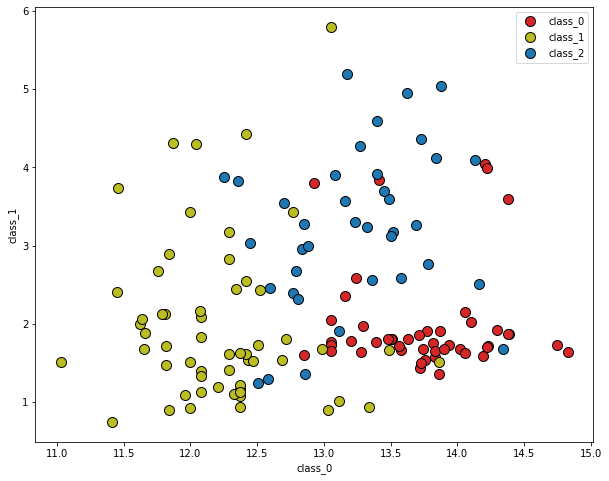

In [93]:
colors = ["tab:red", "tab:olive", "tab:blue"]
feature1, feature2 = 0, 1 # Chosen features
for label, color in zip(range(len(target_names)), colors):
    idx = np.where(wine_y_train == label)
    plt.scatter(
        wine_X_train[idx, feature1],
        wine_X_train[idx, feature2],
        s=100,
        color=color,
        edgecolor="black",
        label=target_names[label]
    )
plt.xlabel(target_names[0])
plt.ylabel(target_names[1])
plt.legend()
plt.show()

## 1.2. Training a Decision Tree (5 points)

Using [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), train a decision tree classifier with entropy as the purity criterion, the provided `seed` as the random state, and a maximum depth of 3.

In [94]:
# TODO: Train your decision tree
import sklearn
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=seed)
tree_clf = tree_clf.fit(wine_X_train[:, :2],wine_y_train)
prediction = tree_clf.predict(wine_X_test[:, :2])
accuracy = sklearn.metrics.accuracy_score(prediction,wine_y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  69.44 %


Plot your decision tree as a graph:

[Text(0.5, 0.875, 'X[0] <= 12.78\nentropy = 1.566\nsamples = 142\nvalue = [47, 57, 38]'),
 Text(0.25, 0.625, 'X[0] <= 12.44\nentropy = 0.579\nsamples = 58\nvalue = [0, 50, 8]'),
 Text(0.125, 0.375, 'X[1] <= 3.785\nentropy = 0.258\nsamples = 46\nvalue = [0, 44, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.375, 0.375, 'X[1] <= 1.405\nentropy = 1.0\nsamples = 12\nvalue = [0, 6, 6]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 10\nvalue = [0, 6, 4]'),
 Text(0.75, 0.625, 'X[1] <= 2.23\nentropy = 1.298\nsamples = 84\nvalue = [47, 7, 30]'),
 Text(0.625, 0.375, 'X[1] <= 1.18\nentropy = 0.857\nsamples = 49\nvalue = [40, 6, 3]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.689\nsamples = 46\nvalue = [40, 3, 3]'),
 Text(0.875, 0.375, 'X[0] <= 14.18

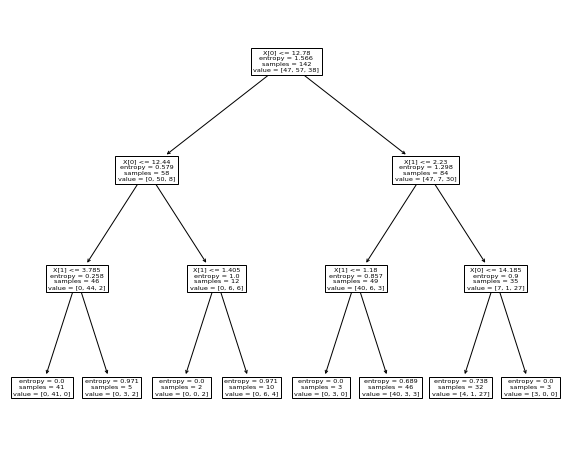

In [95]:
from sklearn.tree import plot_tree
plot_tree(tree_clf)

We can also plot the decision boundaries using the `sklearn.inspection.DecisionBoundaryDisplay` class—in particular, its `from_estimator()` method—which is [new in SciKit-Learn 1.1.2](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay). Due to package availability reasons, we include it in the attached `utils.py` file.

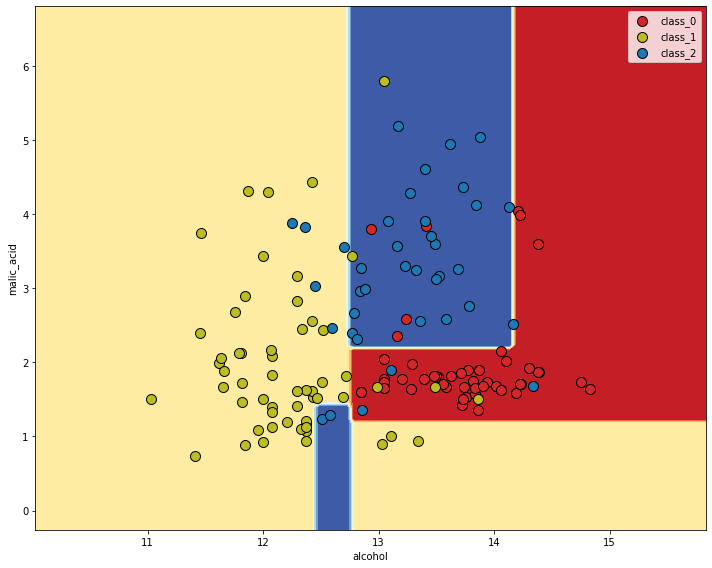

In [96]:
from utils import DecisionBoundaryDisplay

def plot_decision_boundary(clf, X, y, chosen_features, feature_names, target_names):
    feature1, feature2 = chosen_features
    fig, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        np.column_stack((X[:, feature1], X[:, feature2])),
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
    )

    for label, color in zip(range(len(target_names)), colors):
        idx = np.where(y == label)
        plt.scatter(
            X[idx, feature1],
            X[idx, feature2],
            s=100,
            color=color,
            edgecolor="black",
            label=target_names[label]
        )

    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.legend()
    plt.tight_layout()

plot_decision_boundary(
    tree_clf,
    wine_X_train,
    wine_y_train,
    (feature1, feature2),
    feature_names,
    target_names
)

## 1.3. Predicting (10 points)

There are two different functions for prediction within `DecisionTreeClassifier`. 

(1) What are they? Invoke them on the test set in the cells below and look at the outputs. How are they different? How are they related? (2 points)

**_Your answer:_** The two functions are **_predict()_** and **_predict_proba()_**. For a classification model, **_predict()_** returns the predicted class for each sample in **_wine_X_test_** (single value e.g. 0 or 1 or 2), while **_predict_proba()_** returns the predicted class probabilities for each sample in **_wine_X_test_** (array of class probabilities e.g. [0., 1., 0.]). They give the same accuracy score on our test data.

In [97]:
# TODO: Predict function 1
prediction = tree_clf.predict(wine_X_test[:, :2])
print("Prediction Output: ", prediction)
accuracy = sklearn.metrics.accuracy_score(prediction,wine_y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Prediction Output:  [0 1 0 1 1 1 0 2 0 2 1 0 2 0 2 2 0 1 1 1 2 0 0 0 1 1 2 2 2 2 2 1 0 1 2 0]
Accuracy:  69.44 %


In [98]:
# TODO: Predict function 2
prediction_prob = tree_clf.predict_proba(wine_X_test[:, :2])
print("Prediction Output: ", prediction_prob)
transformed_prediction = [x.index(max(x)) for x in prediction_prob.tolist()]
accuracy_prob = sklearn.metrics.accuracy_score(transformed_prediction,wine_y_test)
print("Accuracy: ", '%.2f'% (accuracy_prob*100),"%")

Prediction Output:  [[0.86956522 0.06521739 0.06521739]
 [0.         0.6        0.4       ]
 [0.86956522 0.06521739 0.06521739]
 [0.         1.         0.        ]
 [0.         0.6        0.4       ]
 [0.         1.         0.        ]
 [0.86956522 0.06521739 0.06521739]
 [0.125      0.03125    0.84375   ]
 [0.86956522 0.06521739 0.06521739]
 [0.         0.         1.        ]
 [0.         0.6        0.4       ]
 [0.86956522 0.06521739 0.06521739]
 [0.125      0.03125    0.84375   ]
 [0.86956522 0.06521739 0.06521739]
 [0.125      0.03125    0.84375   ]
 [0.         0.         1.        ]
 [0.86956522 0.06521739 0.06521739]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.125      0.03125    0.84375   ]
 [0.86956522 0.06521739 0.06521739]
 [0.86956522 0.06521739 0.06521739]
 [0.86956522 0.06521739 0.06521739]
 [0.         0.6        0.4       ]
 [0.         1.         0.        ]
 [0.125      0.03125    0.84375   ]
 [0.125 

(2) Compute the accuracy, precision, and F1-score to assess your decision tree's performance below. How is the performance? (3 points)

**_Your answer:_** The model has a low accuracy of 69.44 % on test data which may be due to the dataset size being small and we only training the model using 2 features for the classification task. The accuracy, precision, and F1-score are computed below with the type of averaging used.

Precision using average=macro: 0.694
Precision using average=weighted: 0.708
Recall using average=macro: 0.692
Recall using average=weighted: 0.694
F1 score using average=macro: 0.690
F1 score using average=weighted: 0.699


Text(0.5, 1.05, 'Confusion Matrix')

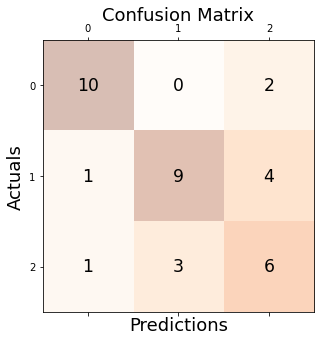

In [99]:
# TODO: Evaluate decision tree's performance
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
prediction = tree_clf.predict(wine_X_test[:, :2])

print('Precision using average=macro: %.3f' % precision_score(wine_y_test, prediction, average='macro'))
print('Precision using average=weighted: %.3f' % precision_score(wine_y_test, prediction, average='weighted'))
print('Recall using average=macro: %.3f' % recall_score(wine_y_test, prediction, average='macro'))
print('Recall using average=weighted: %.3f' % recall_score(wine_y_test, prediction, average='weighted'))
print('F1 score using average=macro: %.3f' % f1_score(wine_y_test, prediction, average='macro'))
print('F1 score using average=weighted: %.3f' % f1_score(wine_y_test, prediction, average='weighted'))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=wine_y_test, y_pred=prediction)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

(3) Experiment with different parameters (*e.g.*, depth, selection criterion) and observe the change in decision boundaries as well as the evaluation scores. Report the optimal configuration and its corresponding scores. How does changing the depth improve or worsen the performance of the decision tree, specifically in the context of this dataset? (5 points)

**_Your answer:_**
The training accuracy goes up as we increase max_depth but for testing accuracy things are not that straight-forward. Setting a high max_depth might simply lead to the decision tree overfitting the model without learning all the useful patterns which causes the testing accuracy to decrease. But setting the max_depth too low limits the flexibility of the decision tree to capture the information in the training data. This also causes the testing accuracy to decrease. Therefore, we perform the below experiment with a range of max_depth values and 2 selection criterion options and find the best combination in terms of test accuracy.

*****************************************************
Experimenting with only depth ranging from 1 to 10
*****************************************************
Best Test Accuracy:  77.78 %
Max Depth for Best Test Accuracy:  2
Train Accuracy:  82.39 %
*****************************************************************
Experimenting with selection criterion using 'gini' and 'entropy'
*****************************************************************
Best Test Accuracy:  61.11 %
Criterion for Best Test Accuracy:  entropy
Train Accuracy:  100.00 %
*****************************************************
Experimenting with both depth and selection criterion
*****************************************************
Best Test Accuracy:  77.78 %
Criterion for Best Test Accuracy:  entropy
Max Depth for Best Test Accuracy:  2
Train Accuracy:  82.39 %


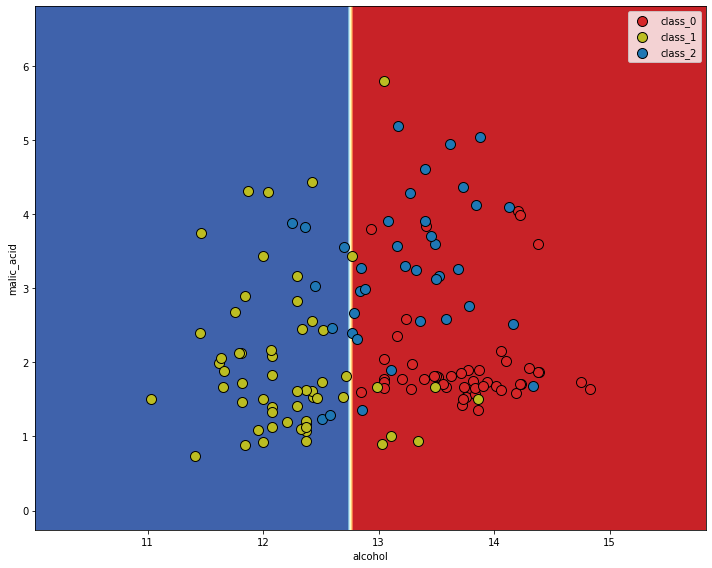

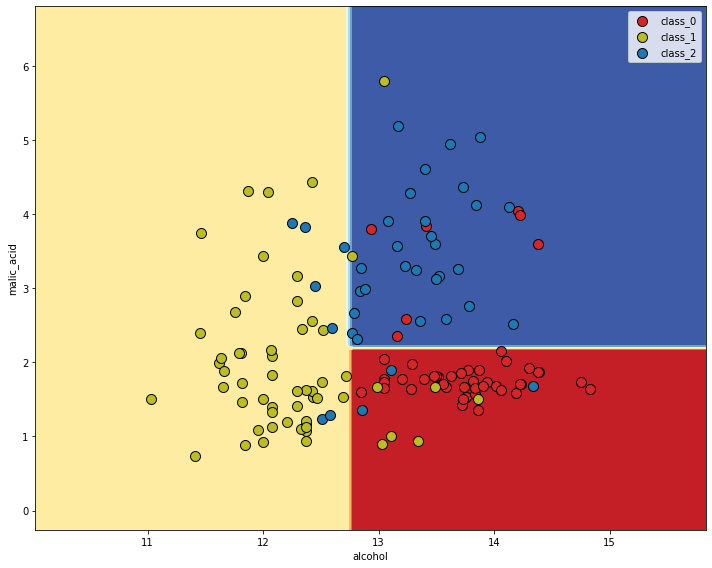

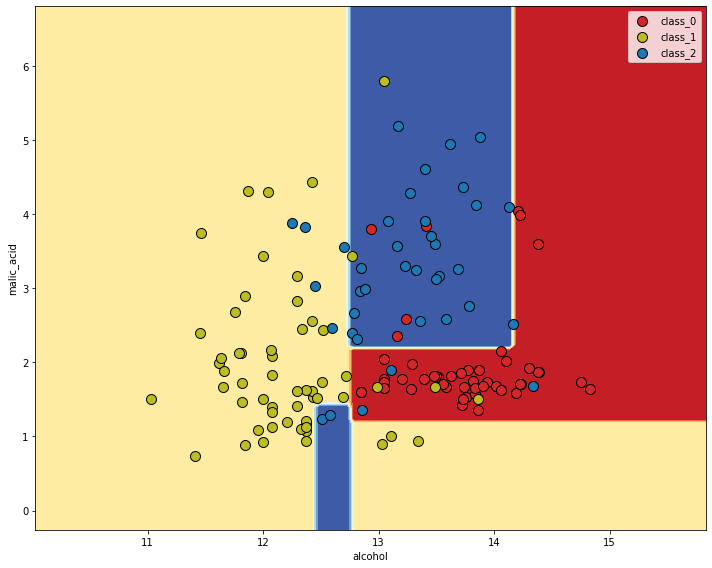

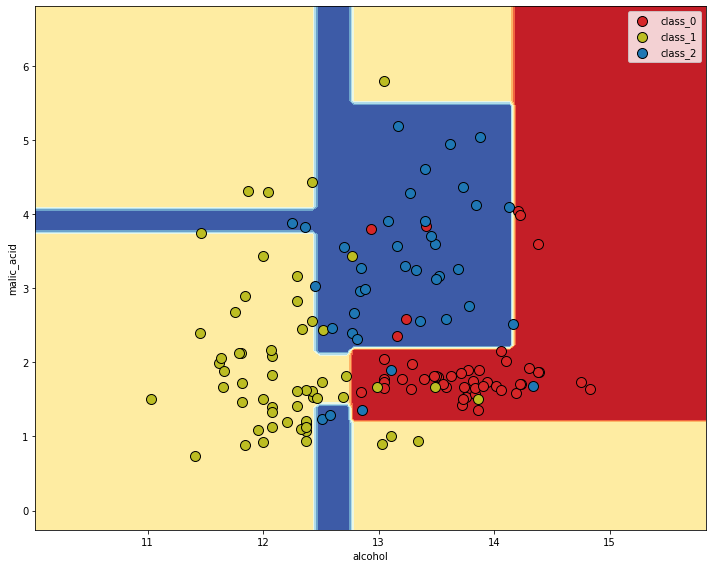

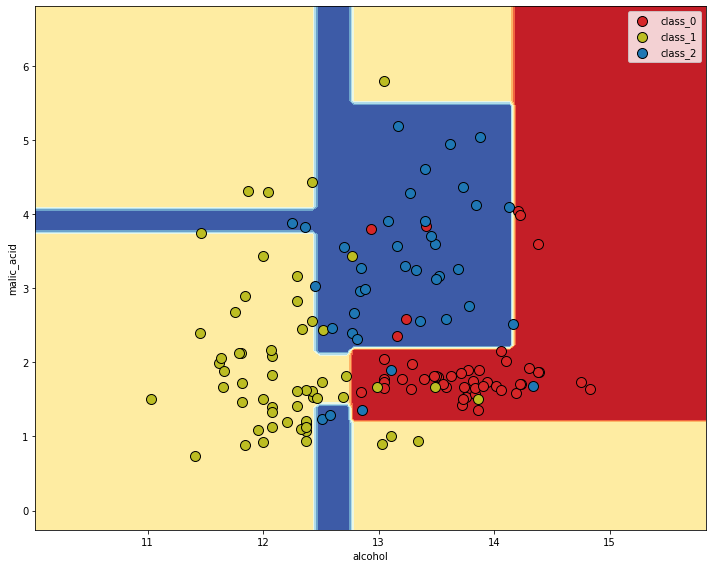

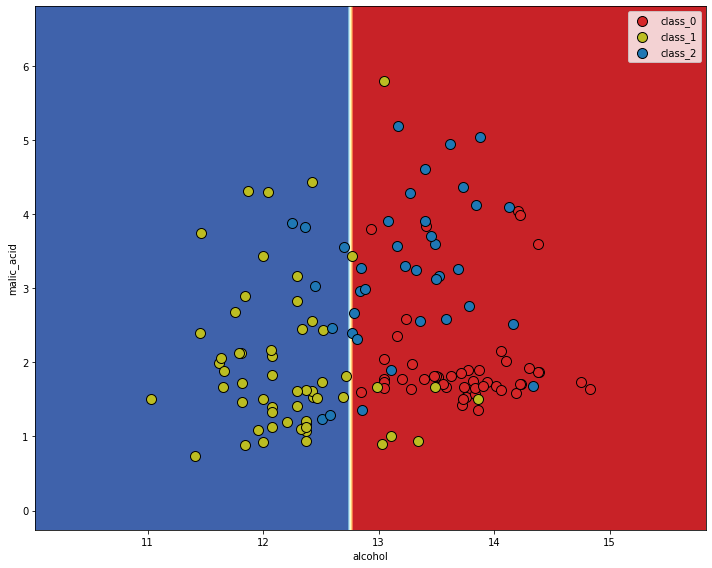

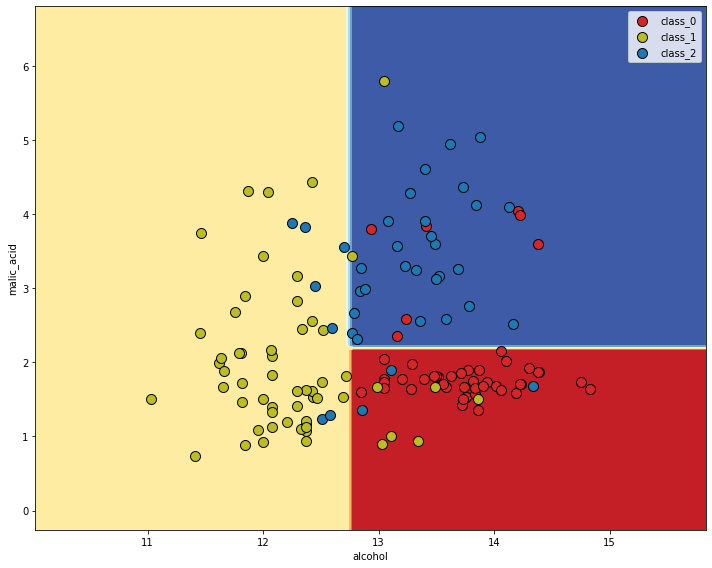

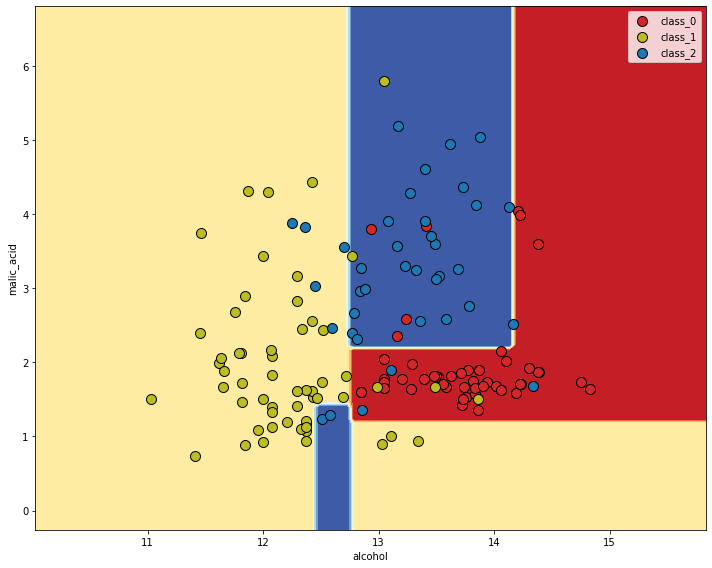

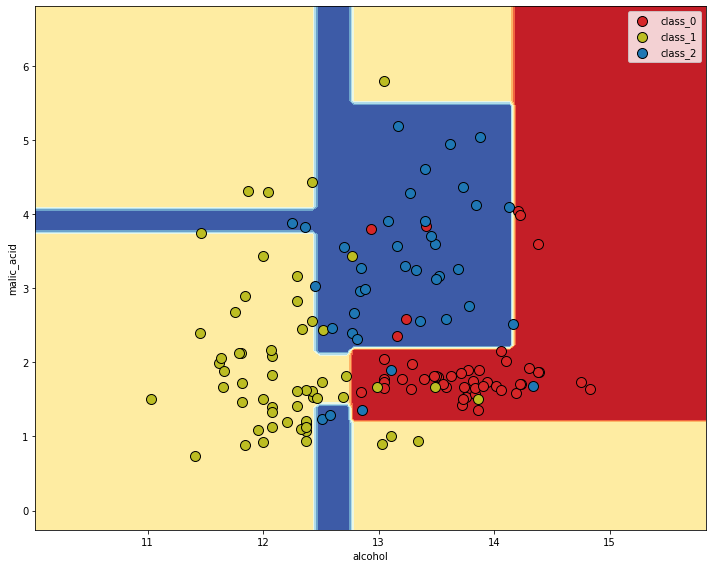

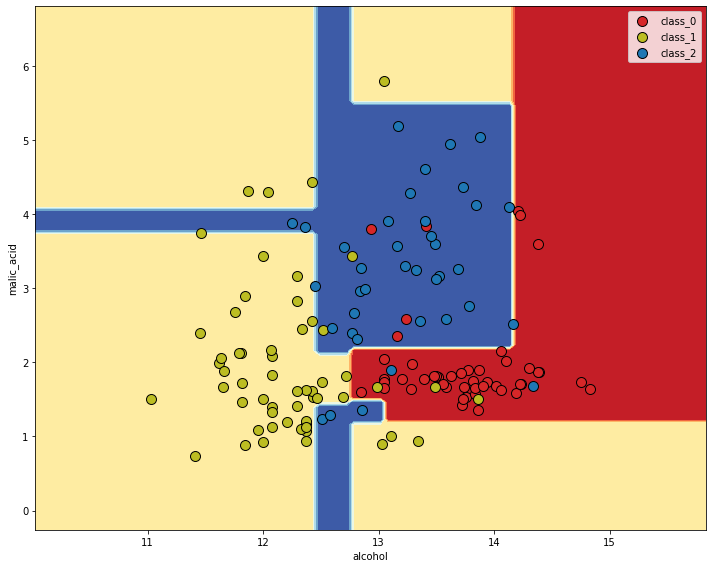

In [100]:
print("*****************************************************")
print("Experimenting with only depth ranging from 1 to 10")
print("*****************************************************")
max_depths = [i for i in range(1, 11)]
depth_train_accuracies = []
depth_test_accuracies = []
for max_depth in max_depths:
  depth_tree_clf_exp = tree.DecisionTreeClassifier(max_depth=max_depth)
  depth_tree_clf_exp = depth_tree_clf_exp.fit(wine_X_train[:, :2],wine_y_train)
  depth_train_prediction= depth_tree_clf_exp.predict(wine_X_train[:, :2])
  depth_test_prediction = depth_tree_clf_exp.predict(wine_X_test[:, :2])
  depth_train_accuracy = sklearn.metrics.accuracy_score(depth_train_prediction,wine_y_train)
  depth_test_accuracy = sklearn.metrics.accuracy_score(depth_test_prediction,wine_y_test)
  depth_train_accuracies.append(depth_train_accuracy)
  depth_test_accuracies.append(depth_test_accuracy)
idx_d = depth_test_accuracies.index(max(depth_test_accuracies))
print("Best Test Accuracy: ", '%.2f'% (max(depth_test_accuracies)*100),"%")
print("Max Depth for Best Test Accuracy: ", max_depths[idx_d])
print("Train Accuracy: ", '%.2f'% (depth_train_accuracies[idx_d]*100),"%")

print("*****************************************************************")
print("Experimenting with selection criterion using 'gini' and 'entropy'")
print("*****************************************************************")
selection_criterions = ["entropy", "gini"]
criterion_train_accuracies = []
criterion_test_accuracies = []
for criterion in selection_criterions:
  criterion_tree_clf_exp = tree.DecisionTreeClassifier(criterion = criterion)
  criterion_tree_clf_exp = criterion_tree_clf_exp.fit(wine_X_train[:, :2],wine_y_train)
  criterion_train_prediction= criterion_tree_clf_exp.predict(wine_X_train[:, :2])
  criterion_test_prediction = criterion_tree_clf_exp.predict(wine_X_test[:, :2])
  criterion_train_accuracy = sklearn.metrics.accuracy_score(criterion_train_prediction,wine_y_train)
  criterion_test_accuracy = sklearn.metrics.accuracy_score(criterion_test_prediction,wine_y_test)
  criterion_train_accuracies.append(criterion_train_accuracy)
  criterion_test_accuracies.append(criterion_test_accuracy)
idx_c = criterion_test_accuracies.index(max(criterion_test_accuracies))
print("Best Test Accuracy: ", '%.2f'% (max(criterion_test_accuracies)*100),"%")
print("Criterion for Best Test Accuracy: ", selection_criterions[idx_c])
print("Train Accuracy: ", '%.2f'% (criterion_train_accuracies[idx_c]*100),"%")

print("*****************************************************")
print("Experimenting with both depth and selection criterion")
print("*****************************************************")
train_accuracies = []
test_accuracies = []
max_depths = [i for i in range(1, 6)]
for criterion in selection_criterions:
  for max_depth in max_depths:
    tree_clf_exp = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
    tree_clf_exp = tree_clf_exp.fit(wine_X_train[:, :2],wine_y_train)
    train_prediction= tree_clf_exp.predict(wine_X_train[:, :2])
    test_prediction = tree_clf_exp.predict(wine_X_test[:, :2])
    train_accuracy = sklearn.metrics.accuracy_score(train_prediction,wine_y_train)
    test_accuracy = sklearn.metrics.accuracy_score(test_prediction,wine_y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    plot_decision_boundary(
    tree_clf_exp,
    wine_X_train,
    wine_y_train,
    (feature1, feature2),
    feature_names,
    target_names
    )
idx = test_accuracies.index(max(test_accuracies))
best_selection_criterion = "entropy" if idx < 10 else "gini"
best_max_depth = idx+1 if idx < 10 else idx-10
print("Best Test Accuracy: ", '%.2f'% (max(test_accuracies)*100),"%")
print("Criterion for Best Test Accuracy: ", best_selection_criterion)
print("Max Depth for Best Test Accuracy: ", best_max_depth)
print("Train Accuracy: ", '%.2f'% (train_accuracies[idx]*100),"%")

# Section 2. Support Vector Machines [ 25 points ]

In this section, you will experiment with different datasets using SciKit-Learn's implementation of support vector machines (SVMs). This will give you better intuitions about utilizing SVMs when it comes to different two-dimensional datasets. You will also implement a Gaussian kernel for non-linear SVM classification.

## 2.1. Linear SVM (5 points)

In this subsection, we will experiment with a dataset that can be separated with a linear decision boundary. We want to experiment with different $C$ values to understand their effects on our linear decision boundary.

Let's first load the dataset (`svm_data1.mat` in MatLab format) using SciPy's `loadmat()` function.

In [101]:
data1 = loadmat(data_path / "svm_data1.mat")
X1, y1 = data1["X"], data1["y"][:, 0] # "X" and "y" are keys for this dataset
X1.shape, y1.shape # 2D samples + labels

((51, 2), (51,))

We provide code for plotting data and SVM decision boundaries below:

In [102]:
def plot_data(X, y, ax=None):
    """Plot 2D dataset."""
    positive = (y == 1)
    negative = (y == 0)
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(X[positive, 0], X[positive, 1], "X", mew=1, ms=10, mec="k")
    ax.plot(X[negative, 0], X[negative, 1], "o", mew=1, mfc="tab:olive", ms=10, mec="k")


def plot_linear_boundary(X, y, model, ax=None):
    """Plot linear boundary."""
    if model is None:
        return
    w = model.coef_[0]    # the theta of your SVM classifier
    b = model.intercept_  # the bias of your SVM classifier
    xp = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    yp = -(w[0] * xp + b) / w[1]
    if ax is None:
        fig, ax = plt.subplots()
    plot_data(X, y, ax)
    ax.plot(xp, yp)
    
    
def plot_nonlinear_boundary(X, y, model, ax=None):
    """Contour plot that delineates a nonlinear boundary."""
    if model is None:
        return
    num_points = X.shape[0]//10
    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), num_points)
    x2 = np.linspace(min(X[:, 1]), max(X[:, 1]), num_points)
    X1, X2 = np.meshgrid(x1, x2)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        X_ = np.stack((X1[:, i], X2[:, i]), axis=1)
        vals[:, i] = model.predict(X_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.contourf(X1, X2, vals, cmap="YlGnBu", alpha=0.2)    
    plot_data(X, y, ax)

We want to first visualize our dataset in two-dimensional space:

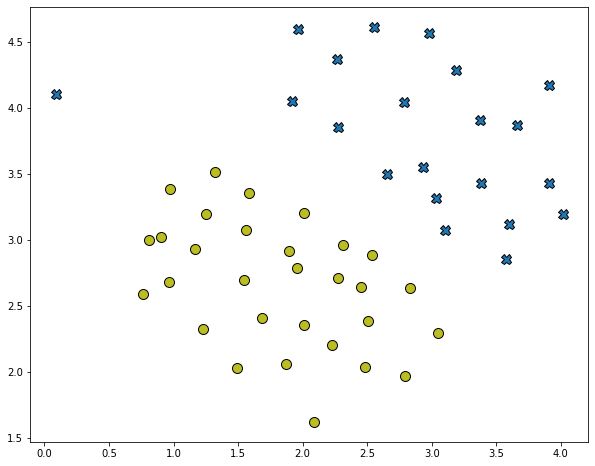

In [103]:
# Plot training data
plot_data(X1, y1)

(1) Describe the dataset. How does it lend itself well to the use of an SVM? Are there any abnormalities that may affect our model's performance? (2 points)

**_Your answer:_**
We can observe that through the above plot that the data can be categorized into two classes using a linear decision boundary with an exception of one outlier. This makes the dataset an ideal candidate for classification using Linear SVM. The above problem is a classification task on a labelled dataset. Hence, we can use a supervised learning approach to tackle it. SVM fits the bill as it is a supervised learning algorithm that creates a hyperplane to seperate the data into classes based on the labels we provide by transforming the data. SVM is sensitive to outliers in the training set. In our case, we have an outlier which may affect our SVM's accuracy.

Now, we want to train linear SVMs for our dataset. You should pick **6 different $C$ values** to train your SVMs, then plot all of them side by side for convenient juxtaposition. You should train your models with **L2 penalty** and **hinge loss**. Use the provided `seed`. We provide code for side-by-side plots below.

{2: 1.0, 8: 1.0, 32: 1.0, 128: 1.0, 512: 1.0, 2048: 1.0}


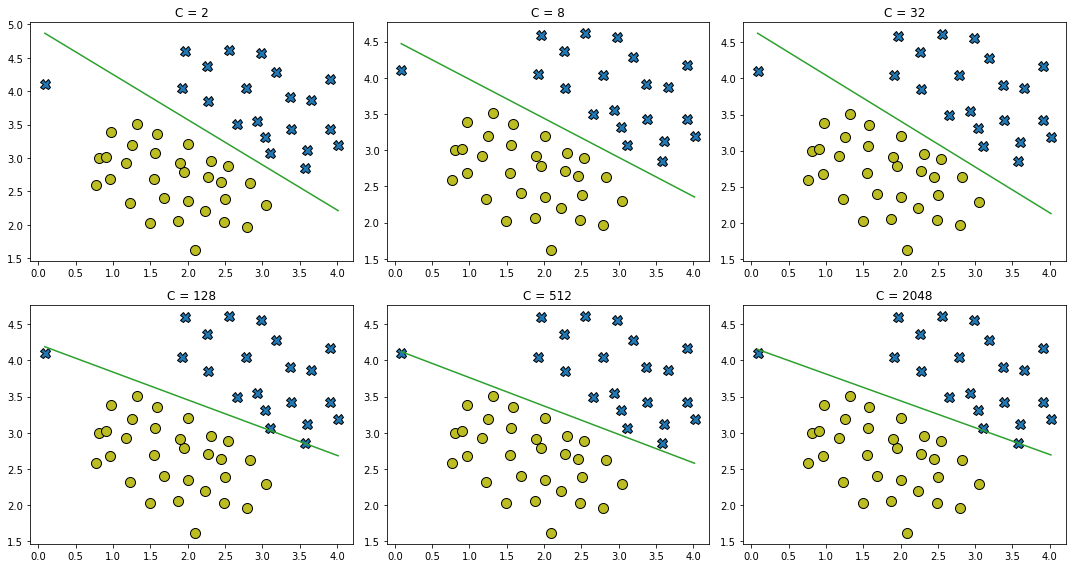

In [104]:
import math
from sklearn.svm import LinearSVC
from sklearn import metrics

# TODO: Replace None's with appropriate values
Cs = [2, 8, 32, 128, 512, 2048]

cols = 3
rows = math.ceil(len(Cs) / cols)

# Empty dictionary to store accuracies
accuracies = {}

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
for row in range(rows):
    for col in range(cols):
        C = Cs[row * cols + col]
        # TODO: Train SVM
        # Split dataset into training set and test set
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=seed)
        svm_clf = LinearSVC(penalty='l2', loss='hinge', C=C)
        #Train the model using the training sets
        svm_clf.fit(X1_train, y1_train)
        #Predict the response for test dataset
        y_pred = svm_clf.predict(X1_test)
        #Compute Model Accuracy
        accuracies[C]= metrics.accuracy_score(y1_test, y_pred)
        # End of code
        plot_linear_boundary(X1, y1, svm_clf, axes[row, col])
        axes[row, col].set_title(f"C = {C}")
plt.tight_layout()
print(accuracies)

(2) What does $C$ intuitively represent, and how does varying it affect our SVM's decision boundary, according to the graphs? Take into account any abnormalities mentioned above. (3 points)

**_Your answer:_** There are two components to the optimization problem for traning an SVM: First being **regularization for the weights** and second being **loss term to make sure that the weights classify training samples accurately**. The $C$ parameter controls the trade-off between the above two components. If we set a **very high value of $C$**, the model becomes really **good at classifying training data but we risk over-fitting to the training samples**. This issue is kept in check with the first component of regularization of weights. Alternatively if we set a **very low value of $C$**, **we do not optimize the training correctly with a low loss penalization leading to underfitting**. 

We can observe from the above $6$ values of $C$s that for large values of $C$, we get a **hyperplane with a small margin** that gets correctly classifies all training points. Conversely, when **$C$ has a very small value**, the optimization problem finds a **hyperplane with a large margin** which may misclassify more training points. Therefore, training an SVM requires one to balance the importance of the regularization term with respect to the loss term using $C$.

In our case, as we **increased** the value of $C$, the model **tried to classify the outlier correctly more** (decision boundary started tilting anit-clockwise). For **_value=2_**, the decision boundary does not classify the outlier correctly. As we increase $C$ to **_value=2048_**, it is able to take into account the initial outlier and classify all the points correctly.

## 2.2. Kernel SVM (20 points)

In this part of the homework, you will perform non-linear classification using SVMs, with Gaussian kernels in particular.

### 2.2.1. Gaussian Kernel (10 points)

Similarly to Gaussian basis functions, we can use Gaussian kernels to find non-linear decision boundaries. As mentioned in lectures and chapter 6.2 of the Bishop textbook (page 296), these kernels are of the form:

$$
    k(\mathbf{x}, \mathbf{x}') = \exp \left\{ -\frac{\lVert\mathbf{x} - \mathbf{x}'\rVert^2}{2\sigma^2}\right\}
$$

Implement a Gaussian kernel matrix for our SVMs below. We will be using [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) as our model.

In [105]:
from scipy.linalg import norm

def f(x, x_prime, sigma): 
    
    gamma =  -0.5/(sigma**2)
    k =  np.zeros([x.shape[0], x_prime.shape[0]])
    for i in range(len(x)):
      for j in range(len(x_prime)):
        u = x[i]
        v = x_prime[j]
        k[i][j] = np.exp(gamma * (norm(u-v)**2))

    return k

def kernel_wrapper(f, sigma):
  return lambda x, x_prime: f(x, x_prime, sigma)

Note that according to [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), our resulting kernel matrix should have size `(n_samples, n_samples)`. Once you have completed the implemetation of `gaussian_kernel_matrix()`, the following cell will test your kernel function on two provided examples, after which you should expect to see a value of:

<pre>
[[1.         0.32465247]
 [0.32465247 1.        ]]
</pre>

In [106]:
x1 = np.array([[1, 2, 1],[0, 4, -1]])
x2 = np.array([[1, 2, 1],[0, 4, -1]])
sigma = 2.0

kernel_matrix = f(x1, x2, sigma)
print(kernel_matrix)

[[1.         0.32465247]
 [0.32465247 1.        ]]


### 2.2.2. Training SVM with a Gaussian Kernel (5 points)

Let's demonstrate a Gaussian-kernel SVM on a non-linear dataset:

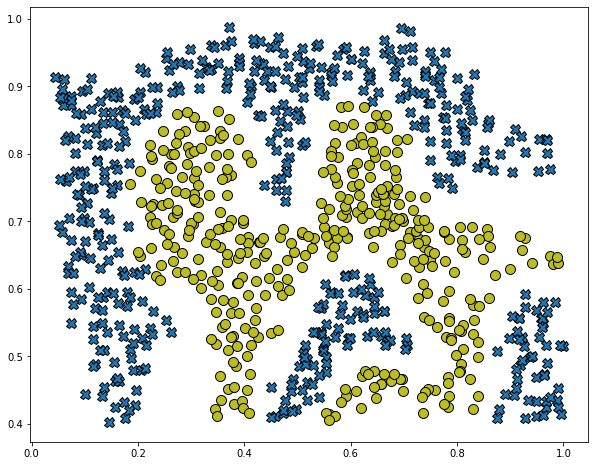

In [107]:
data2 = loadmat(data_path / "svm_data2.mat")
X2, y2 = data2["X"], data2["y"][:, 0]
plot_data(X2, y2)

Apply a Gaussian kernel to your non-linear SVC model below; an SVC example with a custom kernel is available [here](https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html). Note the kernel's input arguments.

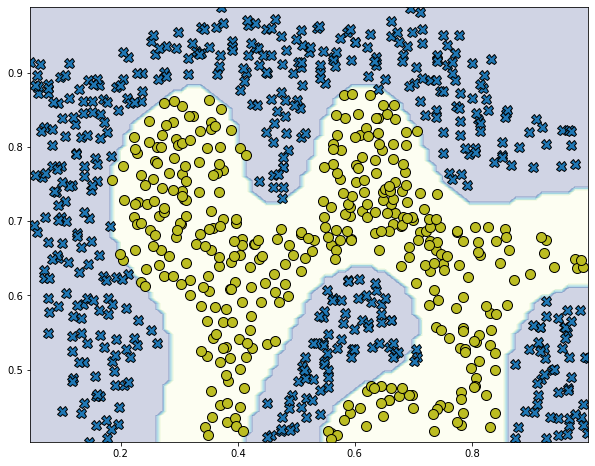

In [108]:
import sklearn.svm as svm

sigma = 0.1
# TODO: Apply Gaussian kernel on SVC with provided seed as random_state
# Split dataset into training set and test set
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=seed)
model = svm.SVC(kernel=kernel_wrapper(f, sigma=sigma))
model.fit(X2, y2)
# End of code
plot_nonlinear_boundary(X2, y2, model) # note that this step could take up to 1 minute

In [109]:
model.score(X2, y2)

0.9895712630359212

### 2.2.3. Grid Search Cross Validation (5 points)

In this part of the homework, you will utilize cross validation with a validation set to finetune your model. You will use Gaussian-kernel SVMs for this task. From the provided dataset (`svm_data3.mat`), you are given a train and validation set:

Text(0.5, 1.0, 'Validation set')

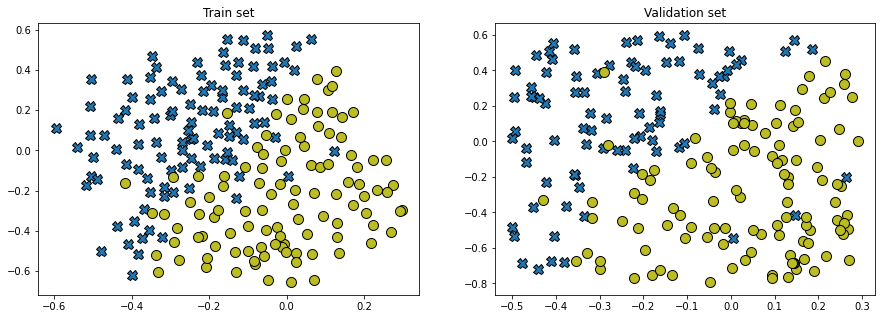

In [110]:
data3 = loadmat(data_path / "svm_data3.mat")

X_train = data3["X"]
y_train = data3["y"][:, 0]
X_val = data3["Xval"]
y_val = data3["yval"][:, 0]

# Plot training and validation data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_data(X_train, y_train, ax1)
plot_data(X_val, y_val, ax2)
ax1.set_title("Train set")
ax2.set_title("Validation set")

Here, you are to use the validation set (`X_val`, `y_val`) to determine the best combination of $C$ and $\sigma$ parameters for your SVM, using accuracy as your metric. We suggest trying values in multiplicative steps for these parameters (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). You should try all possible pairs of values for $C$ and $\sigma$. For example, trying every possible combination of the 2 parameters among the 8 values listed above would result in $8^2 = 64$ different models being trained and validated. Because this could take a long time, we suggest reserving time to work on this section.

Write code to determine the best combination of $C$ and $\sigma$ as well as to return the corresponding values in `search_hyperparameter()` below.

In [111]:
def search_hyperparameter(X_train, y_train, X_val, y_val, Cs, sigmas):
    # TODO: Grid search
    best_accuracy = 0
    best_sigma = 0
    best_C = 0
    iteration_count = 1
    for c in Cs:
      for sigma in sigmas:
        model = svm.SVC(C=c, kernel=kernel_wrapper(f, sigma=sigma))
        model.fit(X_train, y_train)
        accuracy = model.score(X_val, y_val)
        print("Iteration {}: C={} , Sigma={} , Validation Accuracy={}".format(iteration_count, c, sigma, accuracy))
        iteration_count+=1
        if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_C = c
          best_sigma = sigma
    print("Best Model: C={} , Sigma={} , Validation Accuracy={}".format(best_C, best_sigma, best_accuracy))
    return best_C, best_sigma, best_accuracy

Report the best performing parameters along with the accuracy score on `X_val`. You should be able to get an accuracy higher than 0.9. The optimal parameters may not be unique.

In [112]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigmas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
# TODO: Try different SVM hyperparameters
search_hyperparameter(X_train, y_train, X_val, y_val, Cs, sigmas)

Iteration 1: C=0.01 , Sigma=0.01 , Validation Accuracy=0.435
Iteration 2: C=0.01 , Sigma=0.03 , Validation Accuracy=0.435
Iteration 3: C=0.01 , Sigma=0.1 , Validation Accuracy=0.435
Iteration 4: C=0.01 , Sigma=0.3 , Validation Accuracy=0.435
Iteration 5: C=0.01 , Sigma=1 , Validation Accuracy=0.435
Iteration 6: C=0.01 , Sigma=3 , Validation Accuracy=0.435
Iteration 7: C=0.01 , Sigma=10 , Validation Accuracy=0.435
Iteration 8: C=0.01 , Sigma=30 , Validation Accuracy=0.435
Iteration 9: C=0.03 , Sigma=0.01 , Validation Accuracy=0.435
Iteration 10: C=0.03 , Sigma=0.03 , Validation Accuracy=0.435
Iteration 11: C=0.03 , Sigma=0.1 , Validation Accuracy=0.45
Iteration 12: C=0.03 , Sigma=0.3 , Validation Accuracy=0.86
Iteration 13: C=0.03 , Sigma=1 , Validation Accuracy=0.62
Iteration 14: C=0.03 , Sigma=3 , Validation Accuracy=0.435
Iteration 15: C=0.03 , Sigma=10 , Validation Accuracy=0.435
Iteration 16: C=0.03 , Sigma=30 , Validation Accuracy=0.435
Iteration 17: C=0.1 , Sigma=0.01 , Validatio

(1, 0.1, 0.965)

Lastly, train the model again with your optimal parameters and plot decision boundary.

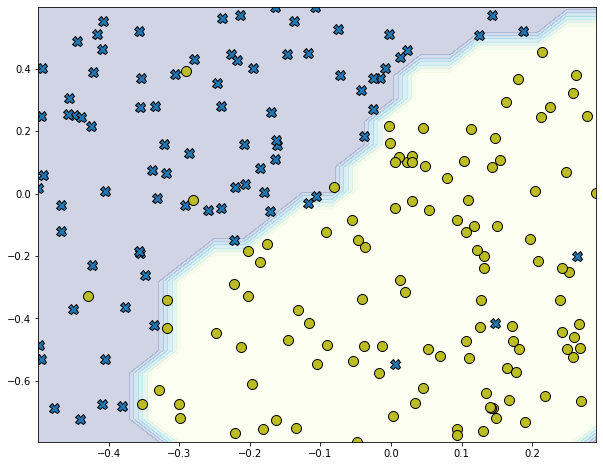

In [113]:
# TODO: Train and plot model with best configuration
best_model = svm.SVC(C=1, kernel=kernel_wrapper(f, sigma=0.1))
best_model.fit(X_train, y_train)
plot_nonlinear_boundary(X_val, y_val, best_model)

In [115]:
!jupyter nbconvert --to PDF "/content/gdrive/MyDrive/ECE_5424_AML/HW2/ankitparekh-SectionB-HW2.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/ECE_5424_AML/HW2/ankitparekh-SectionB-HW2.ipynb to PDF
[NbConvertApp] Support files will be in ankitparekh-SectionB-HW2_files/
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./ankitparekh-SectionB-HW2_files
[NbConvertApp] Making directory ./